# TASK2: TO EXPLORE UNSUPERVISED MACHINE LEARNING

In [82]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as Sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [83]:
df=Sns.load_dataset("iris")

In [84]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [85]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [87]:
df.shape

(150, 5)

In [88]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [89]:
# checking unique column in dataset
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [90]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [91]:
# removing Iris prefix from each species name
df.loc[df['species']=="Iris-setosa",['species']]="Setosa"
df.loc[df['species']=="Iris-virginica",['species']]="Virginica"
df.loc[df['species']=="Iris-versicolor",['species']]="Versicolor"

In [92]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [93]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# Data Visualization
# 1)Scatter Plot

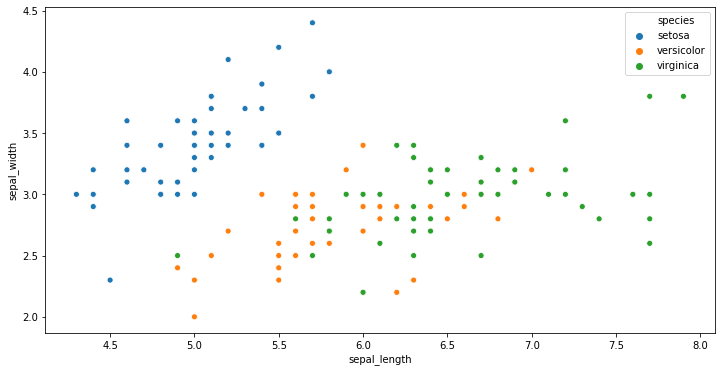

In [94]:
plt.figure(figsize=(12,6))
Sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species')

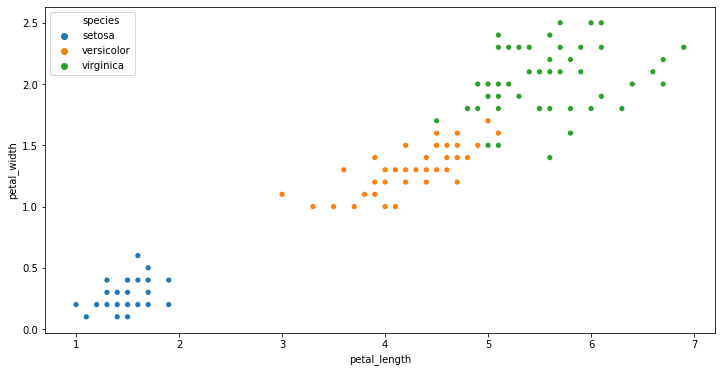

In [95]:
plt.figure(figsize=(12,6))
Sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species')

# 2)Count Plot

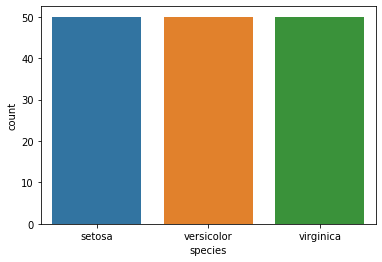

In [96]:
Sns.countplot('species',data=df)

# 3)Pair Plot

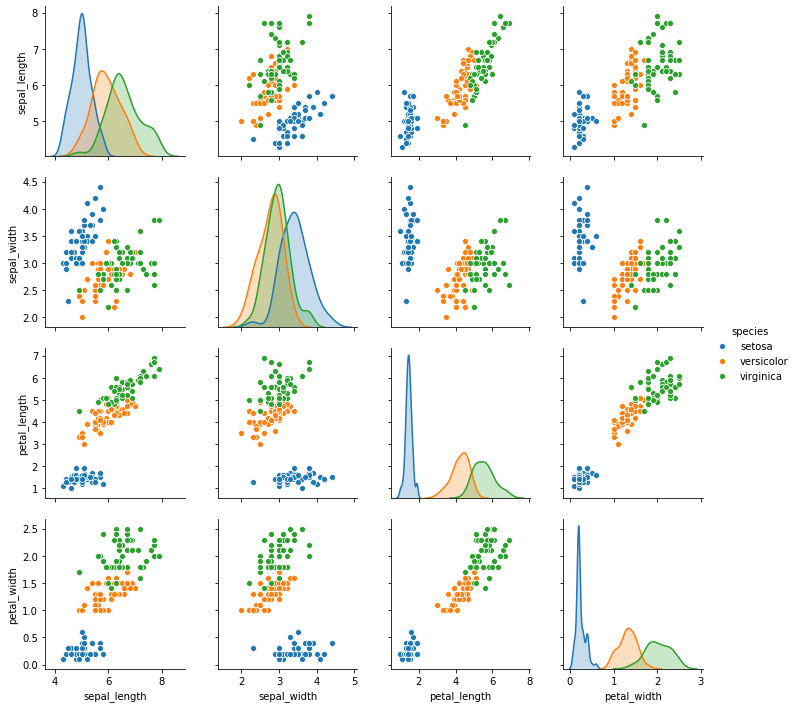

In [97]:
Sns.pairplot(df,diag_kind='kde',hue='species')

# 4)Swarm Plot

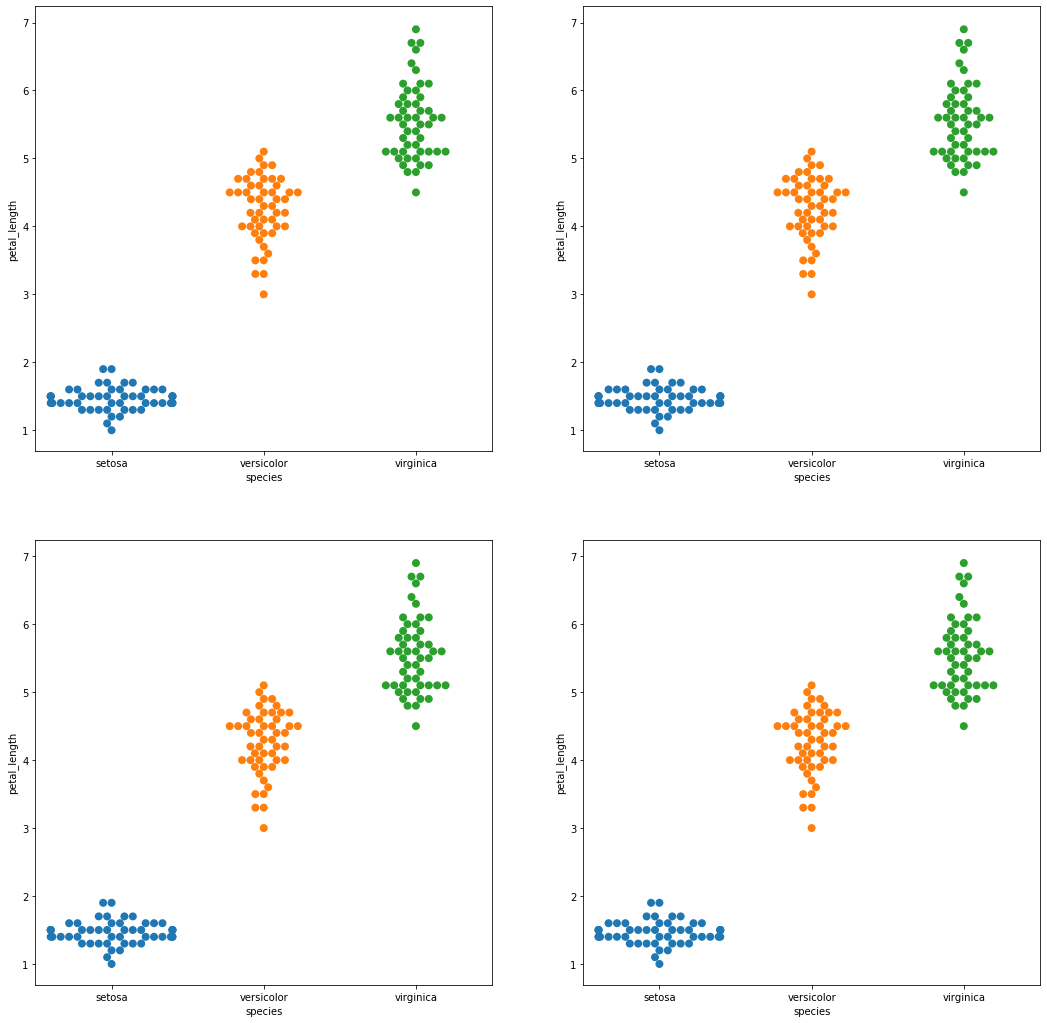

In [98]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
Sns.swarmplot(x='species',y="petal_length",data=df,size=8)
plt.subplot(2,2,2)
Sns.swarmplot(x='species',y="petal_length",data=df,size=8)
plt.subplot(2,2,3)
Sns.swarmplot(x='species',y="petal_length",data=df,size=8)
plt.subplot(2,2,4)
Sns.swarmplot(x='species',y="petal_length",data=df,size=8)

# 5)Box Plot

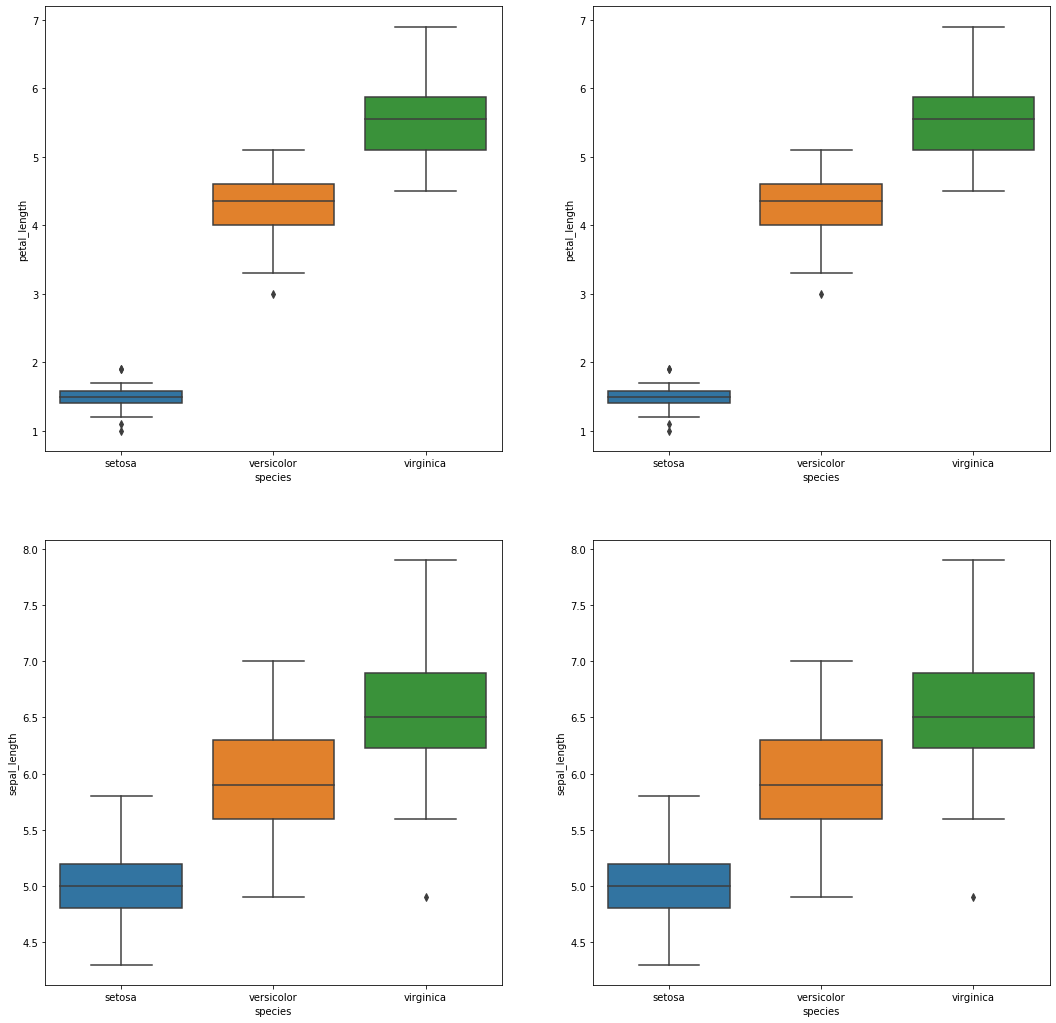

In [99]:
plt.figure(figsize=(18, 18))
plt.subplot(2, 2, 1)
Sns.boxplot(x="species", y="petal_length", data=df)
plt.subplot(2, 2, 2)
Sns.boxplot(x="species", y="petal_length", data=df)
plt.subplot(2, 2, 3)
Sns.boxplot(x="species", y="sepal_length", data=df)
plt.subplot(2, 2, 4)
Sns.boxplot(x="species", y="sepal_length", data=df)

In [100]:
#Checking Correlation 
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


# Kmeans Clustering

In [101]:
from sklearn.cluster import KMeans

In [102]:
#Using Elbow Curve to find the number of clusters
x=df.iloc[:,:-1].values
sse=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=None)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

In [103]:
sse

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.43410591944288,
 30.01588095238096,
 27.8453000683527,
 26.196783928695258]

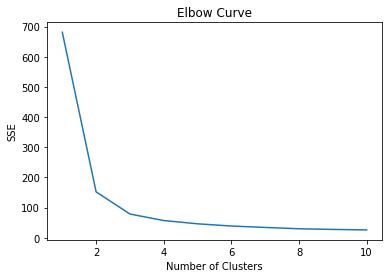

In [104]:
#Graph plotting
plt.plot(range(1,11),sse)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [105]:
#From above Graph taking number of clusters as 3 

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
pred= kmeans.fit_predict(x)

# Final Analysis

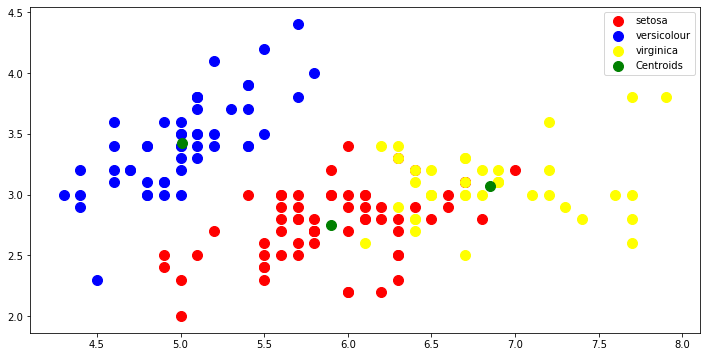

In [106]:

plt.figure(figsize=(12,6))
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], 
            s = 100, c = 'red', label = 'setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], 
            s = 100, c = 'blue', label = 'versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1],
            s = 100, c = 'yellow', label = 'virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')

plt.legend()

# TASK2 COMPLETED